## Data Science & Business Analytics Intern at The Spark Foundation

### Task5:- Exploratory Data Analysis - Sports(Level - Advanced)

### Author- Sneha Nair

**Dataset**-Dataset: https://bit.ly/34SRn3b

**Exploratory Data Analysis** - is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. Here in our task we will Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’ and try to find out thehot zones of terrorism.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('C:\\Users\\Admin\\Downloads\\Indian Premier League\\matches.csv')

In [3]:
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [5]:
data.shape

(756, 18)

In [6]:
data.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [7]:
# We can drop column called umpire3.
data1=data.drop(['umpire3'],axis=1)

In [8]:
#Replacing the missing values with the most frequent values present in each column
data2=data1.fillna(data.mode().iloc[0])

In [9]:
data2.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

In [10]:
data2['winner'].value_counts().idxmax()

'Mumbai Indians'

In [11]:
data2['winner'].value_counts().idxmin()

'Rising Pune Supergiants'

In [12]:
data2.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [13]:
teams = data2.groupby('season')['winner'].value_counts()
teams

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

In [14]:
year = range(2008, 2020)
for n in year:
  print(n)


2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019


In [17]:
year = 2019
win_per_season_data = pd.DataFrame(columns=['year', 'team', 'wins'])
for items in teams.iteritems():    
    if items[0][0]==year:
        print(items)
        win_series = pd.DataFrame({
            'year': [items[0][0]],
            'team': [items[0][1]],
            'wins': [items[1]]
        })
        win_per_season_data = win_per_season_data.append(win_series)

((2019, 'Mumbai Indians'), 12)
((2019, 'Chennai Super Kings'), 10)
((2019, 'Delhi Capitals'), 10)
((2019, 'Kings XI Punjab'), 6)
((2019, 'Kolkata Knight Riders'), 6)
((2019, 'Sunrisers Hyderabad'), 6)
((2019, 'Rajasthan Royals'), 5)
((2019, 'Royal Challengers Bangalore'), 5)


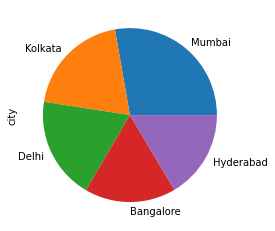

In [20]:
data2['city'].value_counts().head().plot.pie()

In [21]:
winner_per_city =data2.groupby('city')['winner'].value_counts()
winner_per_city

city           winner                 
Abu Dhabi      Rajasthan Royals           3
               Kings XI Punjab            2
               Chennai Super Kings        1
               Kolkata Knight Riders      1
Ahmedabad      Rajasthan Royals           7
                                         ..
Visakhapatnam  Rising Pune Supergiants    2
               Delhi Capitals             1
               Delhi Daredevils           1
               Kings XI Punjab            1
               Rajasthan Royals           1
Name: winner, Length: 211, dtype: int64

In [22]:
venue_ser = data2['venue'].value_counts()

In [23]:
venue_ser

Eden Gardens                                            77
Wankhede Stadium                                        73
M Chinnaswamy Stadium                                   73
Feroz Shah Kotla                                        67
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
SuperSport Park                                         12
Sardar Patel Stadium, Motera                            12
Brabourne Stadium                                       11
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     

In [24]:
venue_data = pd.DataFrame(columns=[ 'matches','venue'])
for items in venue_ser.iteritems():
    temp_data = pd.DataFrame({
        'venue':[items[0]],
        'matches':[items[1]]
    })
    venue_data = venue_data.append(temp_data, ignore_index=True)

In [25]:
venue_data

,matches,venue
0,77,Eden Gardens
1,73,Wankhede Stadium
2,73,M Chinnaswamy Stadium
3,67,Feroz Shah Kotla
4,56,"Rajiv Gandhi International Stadium, Uppal"
5,49,"MA Chidambaram Stadium, Chepauk"
6,47,Sawai Mansingh Stadium
7,35,"Punjab Cricket Association Stadium, Mohali"
8,21,Maharashtra Cricket Association Stadium
9,17,Dr DY Patil Sports Academy


In [27]:
team_wins_ser = data2['winner'].value_counts()

team_wins_data = pd.DataFrame(columns=["team", "wins"])
for items in team_wins_ser.iteritems():
    temp_data1 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    team_wins_data = team_wins_data.append(temp_data1, ignore_index=True)

In [28]:
team_wins_data

,team,wins
0,Mumbai Indians,113
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Rajasthan Royals,75
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Gujarat Lions,13


In [30]:

mvp_ser = data2['player_of_match'].value_counts()

mvp_ten_data = pd.DataFrame(columns=["player", "wins"])
count = 0
for items in mvp_ser.iteritems():
    if count>9:
        break
    else:
        temp_data2 = pd.DataFrame({
            'player':[items[0]],
            'wins':[items[1]]
        })
        mvp_ten_data = mvp_ten_data.append(temp_data2, ignore_index=True)
        count += 1

In [31]:
mvp_ten_data

,player,wins
0,CH Gayle,25
1,AB de Villiers,20
2,RG Sharma,17
3,MS Dhoni,17
4,DA Warner,17
5,YK Pathan,16
6,SR Watson,15
7,SK Raina,14
8,G Gambhir,13
9,V Kohli,12


In [33]:
toss_ser = data2['toss_winner'].value_counts()

toss_data = pd.DataFrame(columns=["team", "wins"])

for items in toss_ser.iteritems():
    temp_data = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    toss_data = toss_data.append(temp_data, ignore_index=True)

In [34]:
toss_data

,team,wins
0,Mumbai Indians,98
1,Kolkata Knight Riders,92
2,Chennai Super Kings,89
3,Kings XI Punjab,81
4,Royal Challengers Bangalore,81
5,Delhi Daredevils,80
6,Rajasthan Royals,80
7,Sunrisers Hyderabad,46
8,Deccan Chargers,43
9,Pune Warriors,20


In [36]:
win_count = 0
for index, value in data2.iterrows():
    if(value['toss_winner']==value['winner']):
        win_count += 1

print(f'The number of times the team winning toss have won: {win_count}')
prob = win_count/len(data2)
print('The probability of winning if won the toss: {:.2f}' .format(prob))

The number of times the team winning toss have won: 393
The probability of winning if won the toss: 0.52


In [38]:
#importing the dataset
deliveries=pd.read_csv('C:\\Users\\Admin\\Downloads\\Indian Premier League\\deliveries.csv')

In [39]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [40]:

deliveries['is_super_over'].value_counts()

0    178997
1        81
Name: is_super_over, dtype: int64

In [41]:
sum(deliveries['extra_runs'])

12004

In [42]:
sum(deliveries['noball_runs'])

749

In [43]:
sum(deliveries['penalty_runs'])

10

In [44]:
sum(deliveries['player_dismissed'].value_counts())

8834

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

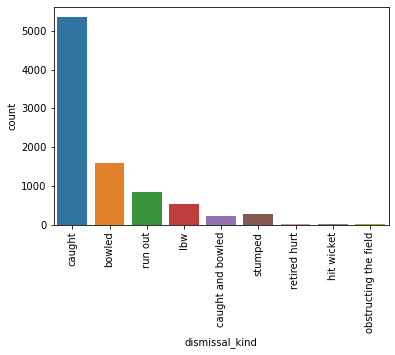

In [45]:

sns.countplot(x = deliveries['dismissal_kind'], data = deliveries)
plt.xticks(rotation = 90)